# Teste - Ciência de Dados / Otimização e Pesquisa Operacional (Short Track)

## Cenário III

O Problema do Caixeiro Viajante (Traveling Salesperson - TSP) é um dos mais famosos problemas de otimização combinatória. Este problema é muito fácil de explicar, mas muito complicado de resolver - mesmo para casos com um pequeno número de cidades.

A origem do problema do caixeiro viajante não é muito clara; ele chega a ser mencionado em um manual de 1832 para caixeiros-viajantes, que incluía exemplos de passeios por 45 cidades alemãs, mas não foi formulado originalmente como um problema matemático. No entanto, em 1800, os matemáticos William Rowan Hamilton e Thomas Kirkman criaram formulações matemáticas do problema.

O TSP pode ser definido da seguinte forma: para uma determinada lista de cidades e as distâncias entre cada par delas, queremos encontrar a rota mais curta possível, que vai a cada cidade uma vez e retorna à cidade de origem.

Existe uma classe de Problemas de Pessoa Caixeira Viajante que assume que a distância de ir da cidade $ i $ à cidade $ j $ é a mesma que ir da cidade $ j $ à cidade $ i $, este tipo de TSP também é conhecido como TSP simétrico. Para o seguinte cenário sugerimos usar distâncias euclidianas, mas a formulação do modelo TSP é válida independentemente da forma como as distâncias individuais são determinadas.

A programação matemática é uma abordagem declarativa em que o modelador formula um modelo de otimização matemática que captura os principais aspectos de um problema de decisão complexo. 

Um modelo de otimização matemática tipicamente vai possuir cinco componentes, a saber:

* Conjuntos e índices;
* Parâmetros;
* Variáveis ​​de decisão;
* Função (ões) objetivo (s);
* Quaisquer restrições.

Como entregável, a indústria necessita de uma formulação de TSP que identifique a rota mais curta para as capitais brasileiras, que vai a todas as cidades uma vez e retorna à cidade de origem (os arquivos a serem utilizados, contendo os dados das capitais brasileiras a serem utilizados nesse cenário, você encontra <a href="https://drive.google.com/drive/folders/1pip1P29vKGYWUOSD0hVrdNLNQcGzG3eN?usp=sharing">aqui</a>)

states_coords.csv: contém a latitude e longitude de cada capital de estado brasileiro;
states_line.json: contém o nome dos estados e a distância em km de todos os pares possíveis assumindo uma linha conectando as cidades;
states_gmaps.json: contém o nome dos estados e a distância em km de todos os pares possíveis com as informações do Google a respeito.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import utils


In [2]:
states_line = pd.read_csv('data/states_line.csv')
states_line.index = states_line.columns

states_gmaps = pd.read_csv('data/states_gmaps.csv')
states_gmaps.index = states_gmaps.columns

states_merged = pd.read_csv('data/states_merged.csv')
states_merged.index = states_merged.columns

states_coords = pd.read_csv('data/states_coords.csv')

A matriz de distância que vamos utilizar é a states_merged, que é matriz states_gmaps (distância do google maps) com os dados faltantes imputados com os valores de states_line (distância em linha reta).
No caso houve um pequeno erro, já que os valores imputados estão em quilômetros, quando os valores de states_gmaps estão em metros. Devemos refazer states_merged.

In [3]:
states_merged = states_gmaps.fillna(states_line*1000)

### Colônia de formigas
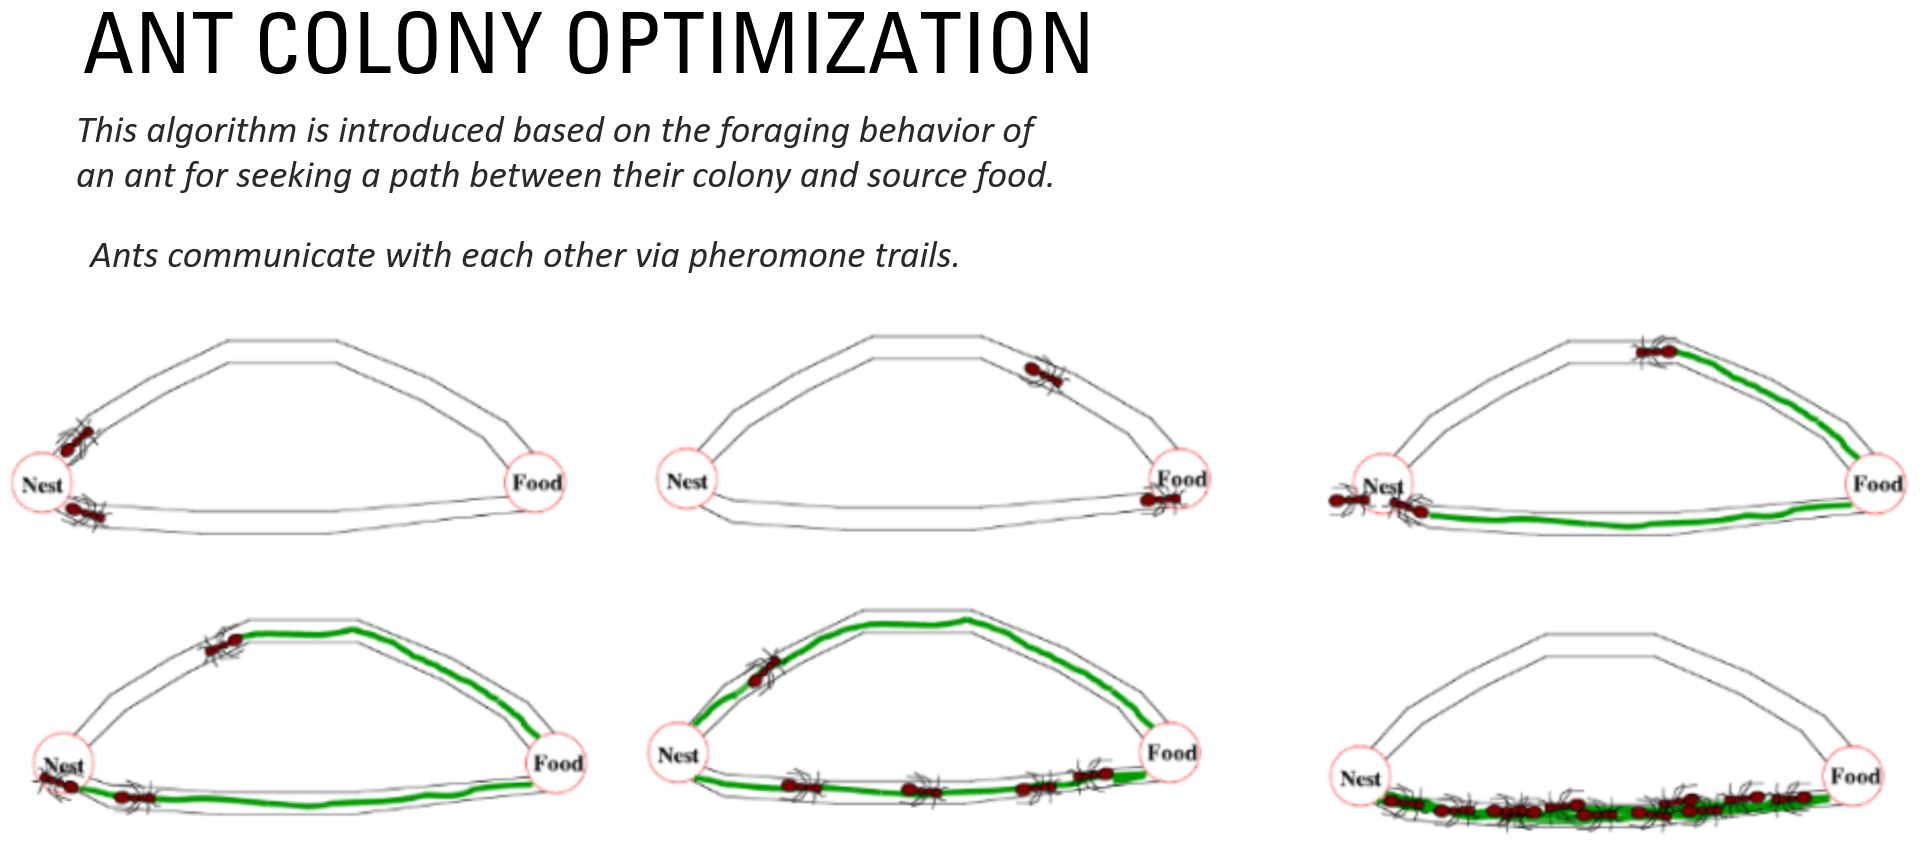


Bom, vamos utilizar minha segunda meta-heurística preferida (algoritmos genéticos é minha preferida), Colônia de formigas!. O algoritmo de colônia de formigas é uma técnica de otimização baseada no comportamento das formigas reais ao procurarem alimentos. De maneira simplificada, o algoritmo simula a comunicação indireta entre formigas por meio de feromônios depositados no ambiente. Vou explicar os passos básicos do algoritmo, utilizando termos técnicos e matemáticos:

1. **Inicialização**:
   - Um conjunto de formigas artificiais é distribuído aleatoriamente em diferentes posições do espaço de busca, onde cada posição representa uma possível solução para o problema em questão.

2. **Construção de Soluções**:
   - Cada formiga constrói uma solução iterativamente, seguindo uma heurística que determina como escolher a próxima posição no espaço de busca. Esta escolha pode ser baseada em informações locais (como a qualidade das soluções já visitadas) e/ou em feromônios depositados pelas formigas anteriores.
   - A probabilidade de uma formiga escolher uma determinada posição $ j $ a partir de uma posição $ i $ pode ser calculada usando uma função de probabilidade que considera a qualidade da solução, $ \tau_{ij} $ (feromônios), e uma heurística, $ \eta_{ij} $, que indica a atratividade da posição $ j $ em relação à posição atual $ i $.

   $$ p_{ij} = \frac{{\tau_{ij}^\alpha \cdot \eta_{ij}^\beta}}{{\sum_{k \in N_i} {\tau_{ik}^\alpha \cdot \eta_{ik}^\beta} }} $$

   Onde:
   - $ p_{ij} $ é a probabilidade de mover-se da posição $ i $ para a posição $ j $.
   - $ \alpha $ e $ \beta $ são parâmetros que controlam a importância dos feromônios e da heurística, respectivamente.
   - $ N_i $ é o conjunto de posições vizinhas à posição $ i $.

3. **Atualização de Feromônios**:
   - Após todas as formigas terem construído suas soluções, uma quantidade de feromônios é depositada em cada aresta do grafo, de acordo com a qualidade das soluções encontradas.
   - Os feromônios evaporam ao longo do tempo para evitar convergência prematura.

   $$ \tau_{ij} = (1 - \rho) \cdot \tau_{ij} + \sum_{k=1}^{m} \Delta\tau_{ij}^{(k)} $$

   Onde:
   - $ \rho $ é a taxa de evaporação dos feromônios.
   - $ m $ é o número de formigas.
   - $ \Delta\tau_{ij}^{(k)} $ é a quantidade de feromônios depositada pela $ k $-ésima formiga na aresta $ (i,j) $.

4. **Critério de Parada**:
   - O algoritmo continua iterando até que um critério de parada seja alcançado, como um número máximo de iterações ou a convergência para uma solução satisfatória.

Este é um esboço geral do algoritmo de colônia de formigas. A eficácia do algoritmo depende da escolha adequada dos parâmetros e da formulação das heurísticas para o problema específico em questão.

In [4]:
distances = np.array(states_merged)
num_nodes = distances.shape[0]
num_ants = 10
num_iterations = 200

colony = utils.AntColony(num_ants, num_nodes, distances)
df_paths = colony.run(num_iterations)
print("Melhor caminho encontrado:", colony.best_path)
print("Comprimento do melhor caminho:", colony.best_path_length)


Melhor caminho encontrado: [23, 22, 10, 25, 21, 8, 14, 17, 5, 13, 16, 4, 12, 20, 6, 11, 2, 1, 0, 7, 15, 3, 19, 18, 9, 24, 23]
Comprimento do melhor caminho: 16568392.097937174


In [5]:
df_paths

,Ant_1,Ant_2,Ant_3,Ant_4,Ant_5,Ant_6,Ant_7,Ant_8,Ant_9,Ant_10
iter_0,3.170822e+07,3.569562e+07,3.869531e+07,3.548364e+07,3.510565e+07,2.911067e+07,3.093676e+07,3.471869e+07,4.073183e+07,4.300928e+07
iter_1,3.349593e+07,2.933916e+07,2.975189e+07,3.162856e+07,3.255087e+07,3.494053e+07,3.093115e+07,3.893430e+07,3.555716e+07,3.468577e+07
iter_2,3.528806e+07,3.319255e+07,3.751537e+07,3.908847e+07,3.162687e+07,3.043795e+07,2.960670e+07,3.423104e+07,2.844494e+07,3.528952e+07
iter_3,3.607957e+07,2.718623e+07,3.480172e+07,3.758021e+07,3.079753e+07,3.382820e+07,3.597838e+07,3.170403e+07,3.661725e+07,3.335402e+07
iter_4,3.789877e+07,2.583870e+07,3.552269e+07,3.154695e+07,3.080699e+07,2.842165e+07,3.567895e+07,3.700904e+07,4.006322e+07,2.994506e+07
...,...,...,...,...,...,...,...,...,...,...
iter_195,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,2.205030e+07,1.656839e+07,1.656839e+07,1.656839e+07
iter_196,2.102490e+07,1.656839e+07,1.656839e+07,1.833557e+07,1.656839e+07,1.656839e+07,2.205030e+07,2.063780e+07,1.656839e+07,2.053554e+07
iter_197,1.656839e+07,1.656839e+07,2.357517e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,2.376661e+07,1.759971e+07
iter_198,2.530983e+07,1.656839e+07,2.088037e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.656839e+07,1.759721e+07,2.088037e+07


A observação do gráfico abaixo evidencia nitidamente a capacidade do algoritmo em diminuir a distância percorrida pela rota ao longo das iterações.

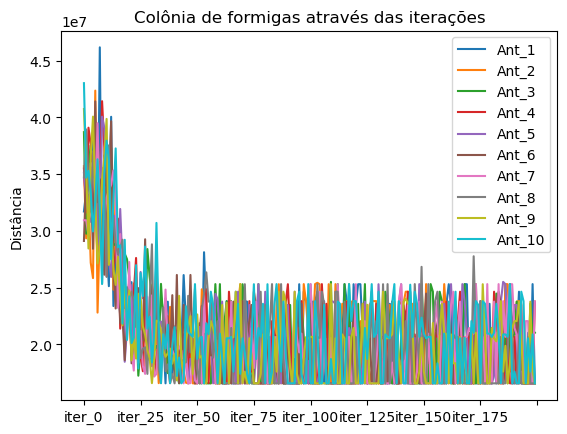

In [6]:
df_paths.plot(title='Colônia de formigas através das iterações', ylabel='Distância');

O dataframe abaixo está ordenado pela configuração da melhor rota.

In [7]:
opt_path_w = states_coords.loc[colony.best_path,:]
opt_path_w

,estado,lat,lng
23,Acre,-9.9666,-67.8000
22,Rondônia,-8.7500,-63.9000
10,Amazonas,-3.1000,-60.0000
25,Roraima,2.8161,-60.6660
21,Amapá,0.0330,-51.0500
8,Pará,-1.4500,-48.4800
14,Maranhão,-2.5160,-44.2660
17,Piauí,-5.0950,-42.7800
5,Ceará,-3.7500,-38.5800
13,Rio Grande do Norte,-5.7800,-35.2400


Podemos até ver nossa rota visualmente. Parece um ótimo roteiro de viagem pelas capitais do Brasil!

In [8]:
estados = opt_path_w.estado
latitudes = opt_path_w.lat
longitudes = opt_path_w.lng

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    mode="lines+markers",
    lat=latitudes,
    lon=longitudes,
    marker={'size': 10},
    text=estados,
))

fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {'lat': sum(latitudes) / len(latitudes), 'lon': sum(longitudes) / len(longitudes)},
        'zoom': 3
    },
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
    title="Caminho percorrido"
)

fig.show()


### Melhorias

- Paralelizar o processamento das formigas em threads diferentes;
- Ajustar o número de formigas, iterações e parâmetros como taxa de feromônio, que trazem um melhor resultado;
- Estudar versões mais recentes do algoritmo. A pesquisa contínua na área de otimização e algoritmos metaheurísticos frequentemente resulta em melhorias significativas na eficácia e eficiência desses métodos.
- Comparar com outras metaheuristicas que resolvem o problema do caixeiro viajante, como algoritmos genéticos, simulated annealing e busca tabu.

